In [1]:
# Reading FTS data from Elasticsearch

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import gridspec

from elasticsearch import Elasticsearch
from elasticsearch.helpers import scan
from time import time
import pprint

es = Elasticsearch(['atlas-kibana.mwt2.org:9200'],timeout=60)
my_index = "rucio-events*"

## Select period you are interested in

In [3]:
start_date = '2016-07-01'
end_date   = '2016-09-22'

### here the query

In [1]:
my_query = {
 'query': { 
  'filtered': {
   'query': { "match_all": {} },
   'filter':{
    'bool': {
     'must': [
      {"exists" : { "field" : "payload.activity" }},
      {'term':{'payload.dst-rse': 'UKI-NORTHGRID-MAN-HEP_DATADISK' }},
      {'term':{'payload.src-rse': 'RRC-KI-T1_DATADISK' }},
      {'range': {'created_at': {'gte': start_date, 'lt': end_date}}}    
     ]
    }
   }
  }
 }
}

NameError: name 'start_date' is not defined

### streaming the documents

In [5]:
t0 = time()
scroll = scan(es, query=my_query, index=my_index)
pp = pprint.PrettyPrinter(indent=4)

count = 0
allSizes=[]
for res in scroll:
    if not count%1000:  print(count)
    if count<1: pp.pprint(res)
    count += 1
    if res['_source']['event_type']=='transfer-done':
        allSizes.append(res['_source']['payload']['bytes'])
    
t1 = time()

print (count, 'events in %f seconds.' %(t1-t0), count/(t1-t0), "ev/s.")

RequestError: TransportError(400, 'parsing_exception', 'no [query] registered for [filtered]')

### ploting some data

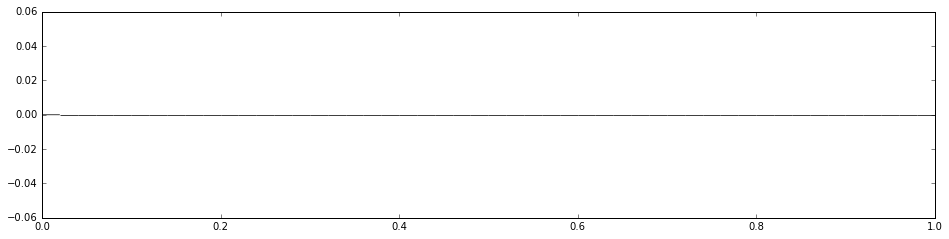

In [6]:
plt.figure(figsize=[16, 17])
gs = gridspec.GridSpec(4, 1)

ax0 = plt.subplot(gs[0])
ax0.hist(allSizes, 50, normed=0, facecolor='green', alpha=0.75)
#ax0.plot(Fthr.timestamp.tolist(), Fthr.throughput.tolist(), ls='-', marker='>', c='r', label=sS+'->'+dS)
#ax0.plot(Bthr.timestamp.tolist(), Bthr.throughput.tolist(), ls='-', marker='<', c='b', label=dS+'->'+sS)
#ax0.set_xlabel('time')
#ax0.set_ylabel('throughput [Gbps]')#,rotation='horizontal')
#ax0.xlim(xmin=0)
#ax0.legend()


#ax2 = plt.subplot(gs[1])
plt.show()